# Clasificador Bayesiano (Naive Bayes Classifier - NBC)

En esta práctica se utilizará un modelo llamado "Naive Bayes Classifier (NBC)", el cual se usa comunmente para problemas de clasificación y en concreto se pueden aplicar para texto. Aplicaremos este modelo a un dataset, el cual, en base a una noticia, se le asigna una categoría a esta última.

In [1]:
import pandas as pd

In [2]:
# Leemos el archivo
noticias = pd.read_csv('C:\\Users\\Luis Carlos\\Documents\\CSVs\\noticias.csv')
noticias.shape

(16495, 2)

In [3]:
# Visualizamos la tabla
noticias

,descripcion,categoria
0,"Aunque parezca mentira, las emisiones de dióxi...",cultura
1,Hubo un proyecto impulsado por la Unión Europe...,cultura
2,China ha confirmado la conclusión con éxito de...,tecnología
3,"En su fructífera carrera como humorista, actor...",cultura
4,Tras dos años de negociación entre la instituc...,cultura
...,...,...
16490,"El vicepresidente del Grupo Atresmedia, Mauriz...",ocio
16491,"En 1930, un millón de personas que vivían en l...",cultura
16492,El cable de cobre es un protagonista omniprese...,cultura
16493,Una inteligencia artificial detecta la enferme...,tecnología


Se observa que es una tabla con 16495 filas y 2 columnas. El problema es que cada fila contiene una noticia completa (como lo veremos a continuación) y a la hora de aplicar el clasificador bayesiano se vuelve un cálculo muy pesado, por lo que volveremos a cargar la tabla, pero esta vez nos quedaremos únicamente con las primeras 2000 noticias.

In [4]:
# Observamos la descripción de la primera noticia
noticias.iloc[0,0]

'Aunque parezca mentira, las emisiones de dióxido de carbono (CO2) y nitrógeno atmosféricos han actuado como fertilizante y han hecho que la Tierra sea hoy más verde que hace 30 años, pero se está acabando: Los ecosistemas terrestres se han saturado y se encaminan ya a una época de mayor calentamiento. Esta es la principal conclusión de un estudio internacional publicado en Nature Ecology & Evolution. El trabajo avisa que la Tierra va a pasar de una época de fertilización a otra de calentamiento aún mayor.'

In [5]:
# Leemos nuevamente el archivo
noticias = pd.read_csv('C:\\Users\\Luis Carlos\\Documents\\CSVs\\noticias.csv').iloc[:2000,]

# Vemos la forma de la tabla cargada
noticias.shape

(2000, 2)

Ahora sí, tenemos 2000 filas y 2 columnas.

In [6]:
# Observamos cómo están distribuidas las categorías en las que se clasifican las noticias
noticias.categoria.value_counts()

cultura       1029
tecnología     532
ocio           439
Name: categoria, dtype: int64

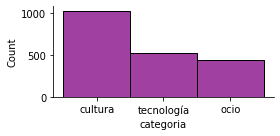

In [7]:
# Visualizamos gráficamente esta proporción
import seaborn as sns
sns.displot(noticias['categoria'], height=2, aspect=2, color='purple')

Observamos que las categorías no son balanceadas, la categoría de "cultura" tiende a sobresalir.

Necesitamos ahora vectorizar el texto de cada noticia, por lo cual mandamos llamar la siguiente función.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

Es necesario también eliminar cierto tipo de palabras llamadas "stopwords" (palabras vacías), las cuales son palabras que no tienen ningún contenido semántico. Por ejemplo, en la frase "el perro ladra" el artículo "el" no aporta ningún valor a la frase. Para eso me he descargado un archivo tipo json el cual contiene palabras específicas del idioma español, las cuales no aportan realmente información reelevante.

In [9]:
import json

with open('C:\\Users\\Luis Carlos\\Documents\\CSVs\\stopwords-es.json') as fname:
    stopwords_es = json.load(fname)

In [10]:
# Mostramos las primeras 30 palabras contenidas en este archivo
stopwords_es[:30]

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '_',
 'a',
 'actualmente',
 'acuerdo',
 'adelante',
 'ademas',
 'ademÃ¡s',
 'adrede',
 'afirmÃ³',
 'agregÃ³',
 'ahi',
 'ahora',
 'ahÃ\xad',
 'al',
 'algo',
 'alguna',
 'algunas',
 'alguno',
 'algunos',
 'algÃºn']

Es necesario también eliminar los acentos de las palabras, por lo cual, incluimos esto último en la siguiente función.

In [11]:
vectorizador = TfidfVectorizer(strip_accents="unicode", stop_words=stopwords_es)

In [12]:
# Forma de la tabla original
noticias.shape

(2000, 2)

In [13]:
vectorizador.fit_transform(noticias.descripcion)

c:\users\luis carlos\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aa', 'aaon', 'adema', 'adia3', 'afirma3', 'agrega3', 'aha', 'ais', 'ala3', 'algaon', 'alla', 'amos', 'an', 'antaa', 'aoltima', 'aoltimas', 'aoltimo', 'aoltimos', 'aqua', 'as', 'asa', 'asegura3', 'bamos', 'ca3mo', 'comenta3', 'considera3', 'cua', 'da3nde', 'deja3', 'dema', 'despua', 'detra', 'estara', 'estuvia', 'explica3', 'expresa3', 'fua', 'haba', 'habra', 'hubia', 'indica3', 'informa3', 'is', 'lla', 'llas', 'llega3', 'llos', 'ma', 'manifesta3', 'menciona3', 'ndo', 'nes', 'ningaon', 'nta', 'ntas', 'nto', 'ntos', 'paa', 'podra', 'pra3ximo', 'pra3ximos', 'qua', 'queda3', 'quia', 'ramos', 'realiza3', 'sa', 'sa3lo', 'sas', 'segaon', 'semos', 'sos', 'sta', 'stas', 'ste', 'stos', 'tambia', 'tao', 'tena', 'tendra', 'todava', 'trava', 'tuvia'] not in stop_wor

<2000x17548 sparse matrix of type '<class 'numpy.float64'>'
	with 46857 stored elements in Compressed Sparse Row format>

Observamos que nos salta un "warning" al ejecutar esta última línea de código, por lo que procederemos a eliminarlo y volveremos a correr la línea.

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
vectorizador.fit_transform(noticias.descripcion)

<2000x17548 sparse matrix of type '<class 'numpy.float64'>'
	with 46857 stored elements in Compressed Sparse Row format>

Ahora tenemos una matriz de 2000 filas y 17548 columnas. Esto es porque se vectorizó el texto de cada una de las filas (sin contar las palabras con acentos ni las stopwords).

Dado que los vectorizadores devuelven una matriz sparse (escasa) creamos un transformador que las convierta a densas.

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer

from scipy.sparse import issparse


# http://rasbt.github.io/mlxtend/
class DenseTransformer(BaseEstimator):
    def __init__(self, return_copy=True):
        self.return_copy = return_copy
        self.is_fitted = False

    def transform(self, X, y=None):
        if issparse(X):
            return X.toarray()
        elif self.return_copy:
            return X.copy()
        else:
            return X

    def fit(self, X, y=None):
        self.is_fitted = True
        return self

    def fit_transform(self, X, y=None):
        return self.transform(X=X, y=y)

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

Scikit-Learn tiene 3 implementaciones del clasificador Naive Bayes: GaussianNB, BernoulliNB y MultinomialNB.
Cada una de ellas se diferencia por cómo calcula las probabilidades de que cada elemento aparezca en los datos.

In [18]:
# Mandamos llamar las librerías
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

Probaremos los 3 métodos y compararemos sus F1-Scores (medida de precisión que tiene un test) correspondientes para determinar cuál de las 3 fue la mejor opción. Recordemos que en el caso del F1-Score, entre más se acerque el valor a 1 es mejor.

### Para una Distribución Gaussiana

In [19]:
# Para una Distribución Gaussiana

pipeline_gaussiano = make_pipeline(
    vectorizador,
    DenseTransformer(),
    GaussianNB()
)

In [20]:
# Ajustamos el modelo
pipeline_gaussiano.fit(X=noticias.descripcion, y=noticias.categoria)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words=['0', '1', '2', '3', '4', '5', '6',
                                             '7', '8', '9', '_', 'a',
                                             'actualmente', 'acuerdo',
                                             'adelante', 'ademas', 'ademÃ¡s',
                                             'adrede', 'afirmÃ³', 'agregÃ³',
                                             'ahi', 'ahora', 'ahÃ\xad', 'al',
                                             'algo', 'alguna', 'algunas',
                                             'alguno', 'algunos', 'algÃºn', ...],
                                 strip_accents='unicode')),
                ('densetransformer', DenseTransformer()),
                ('gaussiannb', GaussianNB())])

In [21]:
# Hacemos las predicciones
pipeline_gaussiano.predict(noticias.descripcion)

array(['cultura', 'cultura', 'tecnología', ..., 'cultura', 'cultura',
       'cultura'], dtype='<U10')

In [22]:
# Traemos el F1-Score
from sklearn.metrics import f1_score

def f1_multietiqueta(estimador, X, y):
    preds = estimador.predict(X)
    return f1_score(y, preds, average="micro")

In [23]:
# Evaluamos su F1-Score con 5 validaciones cruzadas
cross_val_score(pipeline_gaussiano, noticias.descripcion, noticias.categoria, scoring=f1_multietiqueta,cv=5)

array([0.65  , 0.65  , 0.62  , 0.6475, 0.64  ])

In [24]:
# Evaluamos el modelo
print('En promedio, el F1-Score para el modelo de Distribución Gaussiana es:')
cross_val_score(pipeline_gaussiano, noticias.descripcion, noticias.categoria, scoring=f1_multietiqueta,cv=5).mean()

En promedio, el F1-Score para el modelo de Distribución Gaussiana es:


0.6415

Ahora hacemos lo mismo pero tomando en cuenta solamente las 1000 palabras más frecuentes.

In [25]:
pipeline_gaussiano = make_pipeline(
    TfidfVectorizer(strip_accents="unicode", stop_words=stopwords_es, max_features=1000),
    DenseTransformer(),
    GaussianNB()
)

In [26]:
# Evaluamos su F1-Score con 5 validaciones cruzadas
cross_val_score(pipeline_gaussiano, noticias.descripcion, noticias.categoria, scoring=f1_multietiqueta)

array([0.5025, 0.49  , 0.5025, 0.495 , 0.455 ])

In [27]:
print('En promedio, el F1-Score para el modelo de Distribución Gaussiana con solamente las primeras 1000 palabras es:')
cross_val_score(pipeline_gaussiano, noticias.descripcion, noticias.categoria, scoring=f1_multietiqueta).mean()

En promedio, el F1-Score para el modelo de Distribución Gaussiana con solamente las primeras 1000 palabras es:


0.489

### Para una Distribución Multinomial

In [28]:
# Para una distribución multinomial tomando únicamente las primeras 500 palabras más frecuentes:

pipeline_multinomial = make_pipeline(
    TfidfVectorizer(strip_accents="unicode", stop_words=stopwords_es, max_features=500),
    DenseTransformer(),
    MultinomialNB(),
)

In [29]:
# Evaluamos su F1-Score
cross_val_score(pipeline_multinomial, noticias.descripcion, noticias.categoria,
                scoring=f1_multietiqueta)

array([0.6625, 0.6775, 0.6825, 0.66  , 0.6875])

In [30]:
print('En promedio, el F1-Score para el modelo de Distribución Multinomial con solamente las primeras 1000 palabras es:')
cross_val_score(pipeline_multinomial, noticias.descripcion, noticias.categoria,
                scoring=f1_multietiqueta).mean()

En promedio, el F1-Score para el modelo de Distribución Multinomial con solamente las primeras 1000 palabras es:


0.674

### Para una Distribución Binomial

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizador_count = CountVectorizer(stop_words=stopwords_es, binary=True, 
                                     strip_accents="unicode", max_features=1500)

In [32]:
# Hacemos el ajuste
vectorizador_count.fit(noticias.descripcion)

CountVectorizer(binary=True, max_features=1500,
                stop_words=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                            '_', 'a', 'actualmente', 'acuerdo', 'adelante',
                            'ademas', 'ademÃ¡s', 'adrede', 'afirmÃ³', 'agregÃ³',
                            'ahi', 'ahora', 'ahÃ\xad', 'al', 'algo', 'alguna',
                            'algunas', 'alguno', 'algunos', 'algÃºn', ...],
                strip_accents='unicode')

In [33]:
# Observamos 20 palabras junto con la cantidad de veces que aparecieron
list(vectorizador_count.vocabulary_.items())[:20]

[('emisiones', 497),
 ('carbono', 221),
 ('tierra', 1400),
 ('verde', 1454),
 ('30', 33),
 ('anos', 108),
 ('epoca', 523),
 ('principal', 1149),
 ('conclusion', 305),
 ('estudio', 560),
 ('internacional', 760),
 ('publicado', 1191),
 ('nature', 961),
 ('pasar', 1055),
 ('proyecto', 1183),
 ('impulsado', 731),
 ('union', 1432),
 ('europea', 564),
 ('llegaron', 831),
 ('manual', 865)]

Es decir, la paralbra "emisiones" apareció 497 veces, mientras que la palabra "tierra" apareció 1400 veces.

In [34]:
pipeline_bernouilli = make_pipeline(
    vectorizador_count,
    DenseTransformer(),
    BernoulliNB(),
)

In [35]:
# Evaluamos su F1-Score
cross_val_score(pipeline_bernouilli, noticias.descripcion, noticias.categoria, scoring=f1_multietiqueta)

array([0.6625, 0.655 , 0.6475, 0.6125, 0.655 ])

In [36]:
print('En promedio, el F1-Score para el modelo de Distribución Binomial con solamente las primeras 1500 palabras es:')
cross_val_score(pipeline_bernouilli, noticias.descripcion, noticias.categoria, scoring=f1_multietiqueta).mean()

En promedio, el F1-Score para el modelo de Distribución Binomial con solamente las primeras 1500 palabras es:


0.6465

Como conclusión, para este dataset en específico, el modelo que arrojó mejores resultados fue el Clasificador Bayesiano para una Distribución Multinomial, el cual obtuvo una puntuación F1-Score de 0.674 (teniendo en cuenta que en este modelo tomamos únicamente las 500 palabras más frecuentes). El modelo que peor se ajustó a la realidad fue el segundo Clasificador Bayesiano para una Distribución Gaussiana, el cual sólo tomó en cuenta las 1000 palabras más frecuentes, con una puntuación F1-Score de 0.489.